In [1]:
import pandas as pd
import matplotlib.pyplot as plt


c:\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Credit card data loaded successfully.
Loyalty card data loaded successfully.
          timestamp             location  price  last4ccnum
0  01/06/2014 07:28  Brew've Been Served  11.34        4795
1  01/06/2014 07:34     Hallowed Grounds  52.22        7108
2  01/06/2014 07:35  Brew've Been Served   8.33        6816
3  01/06/2014 07:36     Hallowed Grounds  16.72        9617
4  01/06/2014 07:37  Brew've Been Served   4.24        7384
    timestamp             location  price loyaltynum
0  01/06/2014  Brew've Been Served   4.17      L2247
1  01/06/2014  Brew've Been Served   9.60      L9406
2  01/06/2014     Hallowed Grounds  16.53      L8328
3  01/06/2014         Coffee Shack  11.51      L6417
4  01/06/2014     Hallowed Grounds  12.93      L1107


C:\Users\Vilma Lundholm\AppData\Local\Temp\ipykernel_15324\423096961.py:49: UserWarning: Glyph 146 (\x92) missing from current font.
  plt.tight_layout()
c:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


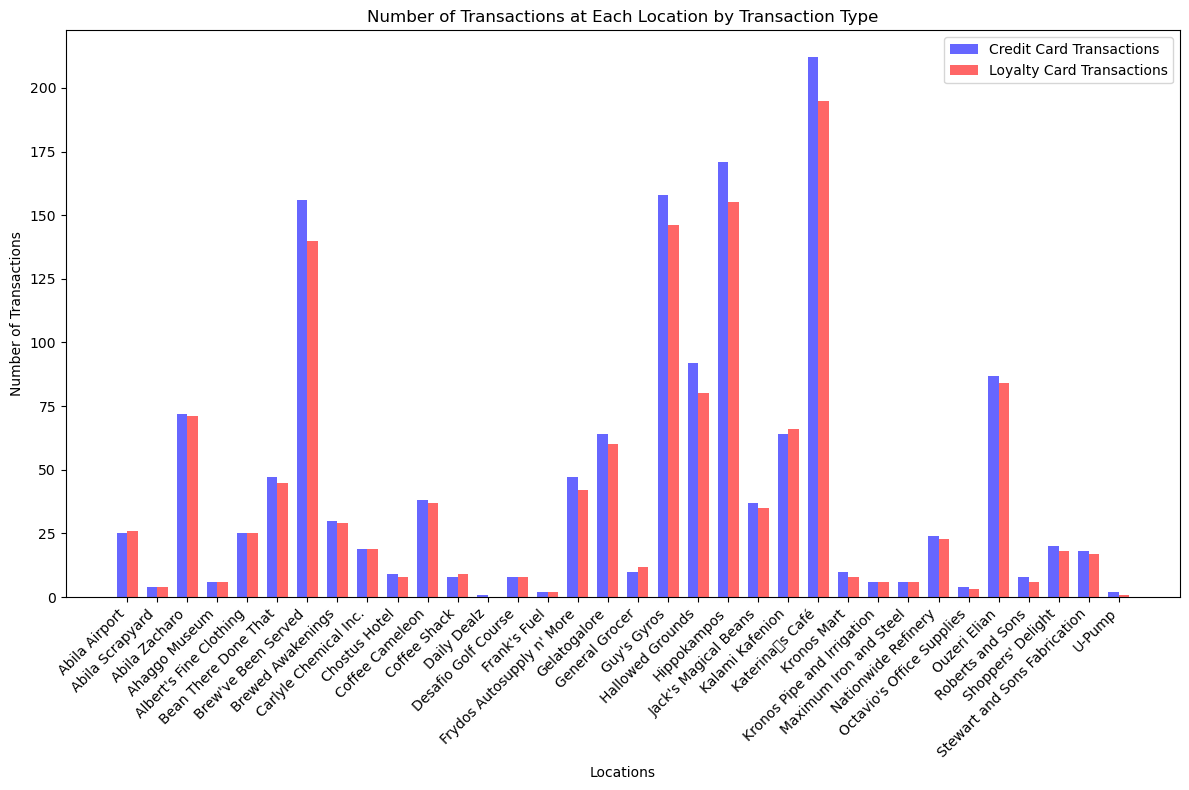

In [2]:
cc_data = pd.read_csv("MC2/cc_data.csv", encoding="latin1")
print("Credit card data loaded successfully.")

loyalty_data = pd.read_csv("MC2/loyalty_data.csv", encoding="latin1")
print("Loyalty card data loaded successfully.")

# Display the first few rows of the datasets
print(cc_data.head())
print(loyalty_data.head())

# Count the number of transactions at each location for both datasets
cc_location_counts = cc_data["location"].value_counts()
loyalty_location_counts = loyalty_data["location"].value_counts()

# Creating the bar chart
plt.figure(figsize=(12, 8))
# Index alignment for the locations between the two dataframes
all_locations = cc_location_counts.index.union(loyalty_location_counts.index)
cc_location_counts = cc_location_counts.reindex(all_locations, fill_value=0)
loyalty_location_counts = loyalty_location_counts.reindex(all_locations, fill_value=0)

# Plotting both sets of data
bar_width = 0.35  # width of bars

index = range(len(all_locations))
plt.bar(
    index,
    cc_location_counts,
    bar_width,
    label="Credit Card Transactions",
    color="b",
    alpha=0.6,
)
plt.bar(
    [p + bar_width for p in index],
    loyalty_location_counts,
    bar_width,
    label="Loyalty Card Transactions",
    color="r",
    alpha=0.6,
)

plt.xlabel("Locations")
plt.ylabel("Number of Transactions")
plt.title("Number of Transactions at Each Location by Transaction Type")
plt.xticks([p + bar_width / 2 for p in index], all_locations, rotation=45, ha="right")
plt.legend()

plt.tight_layout()
plt.show()
